In [1]:
import pandas as pd
import torch
import numpy as np

from sklearn.model_selection import train_test_split
from utils.covariate_data_processing import pbc2_proccess_covariate, padded_mask_processing

In [2]:
df = pd.read_csv(
    "/Users/davidlee/Documents/GitHub/Surtimesurvival/Data Project/Pycox Lib/PBC2 Convariate Data/pbc2_data_proccessed_auton_covariate.csv")

In [3]:
df.head()

,event,time,seq_id,seq_time_id,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0,1.095170,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,1,5.319790,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,1,6.261636,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,1,7.266455,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,...,0,1,0,1,0,0,1,0,1,0


In [4]:
df_temp = df.loc[0:, ['seq_id', 'seq_time_id', 'event', 'time']]
df = df.drop(columns=['seq_id', 'seq_time_id'])

In [5]:
df.head()

,event,time,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,3.281890,1.169016e-16,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,2.015877,-4.694608e-01,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,0.172710,-6.589138e-01,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,-0.013468,-6.036567e-01,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,0.098239,1.169016e-16,...,0,1,0,1,0,0,1,0,1,0


In [6]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [7]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

26.0
______
8
______
13
______
21
______
26
______
[2.73792575e-03 3.83309605e-02 1.86178951e-01 4.73661154e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [8]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [9]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [10]:
padded_patients.shape

torch.Size([312, 16, 21])

In [11]:
masks.shape

torch.Size([312, 16])

In [12]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [13]:
df_y_train.head()

,duration,event,proportion
0,3,1.0,0.006928
1,3,0.0,0.988915
2,3,1.0,0.019002
3,2,1.0,0.314286
4,3,0.0,0.263658


In [14]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [15]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [16]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [17]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [18]:
Y_labels

tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [19]:
import torch
from torch.utils.data import TensorDataset

X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(X_features_data_tensor, Y_labels, masks,
                                                                          test_size=0.3)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)

In [20]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# Hyperparameters
# input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [21]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [22]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 5
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 1/40, Training Loss: 1.0587571071726936, Validation Loss: 5.1601548592249555, Validation Accuracy: 0.5638297872340425
Epoch 2/40, Training Loss: 0.942845527614866, Validation Loss: 4.466465532779694, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 3/40, Training Loss: 0.8980805575847626, Validation Loss: 4.261670549710591, Validation Accuracy: 0.776595744680851
Epoch 4/40, Training Loss: 0.8517403730324337, Validation Loss: 4.633237640062968, Validation Accuracy: 0.7340425531914894


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 5/40, Training Loss: 0.8542543968984059, Validation Loss: 4.160240093866984, Validation Accuracy: 0.7446808510638298
Epoch 6/40, Training Loss: 0.8510022291115352, Validation Loss: 4.286574165026347, Validation Accuracy: 0.7553191489361702


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 7/40, Training Loss: 0.8097610494920185, Validation Loss: 4.082226514816284, Validation Accuracy: 0.776595744680851
Epoch 8/40, Training Loss: 0.8367891545806613, Validation Loss: 4.088833014170329, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 9/40, Training Loss: 0.8022847686495099, Validation Loss: 4.057280798753102, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 10/40, Training Loss: 0.8282432066542762, Validation Loss: 4.180788497130076, Validation Accuracy: 0.7872340425531915
Epoch 11/40, Training Loss: 0.8065401379551206, Validation Loss: 3.9702915946642556, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 12/40, Training Loss: 0.8034559839538166, Validation Loss: 4.0453751881917315, Validation Accuracy: 0.7872340425531915
Epoch 13/40, Training Loss: 0.8041426060455186, Validation Loss: 4.061927179495494, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 14/40, Training Loss: 0.8013733189020839, Validation Loss: 3.9574504295984902, Validation Accuracy: 0.8191489361702128
Epoch 15/40, Training Loss: 0.7712792520012174, Validation Loss: 4.016318062941234, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 16/40, Training Loss: 0.7799277220453534, Validation Loss: 4.0971669753392534, Validation Accuracy: 0.776595744680851
Epoch 17/40, Training Loss: 0.7916092425584793, Validation Loss: 3.932592252890269, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 18/40, Training Loss: 0.7897934083427701, Validation Loss: 3.9860316713651023, Validation Accuracy: 0.7978723404255319
Epoch 19/40, Training Loss: 0.7578112898128373, Validation Loss: 4.001719931761424, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 20/40, Training Loss: 0.7659347110560962, Validation Loss: 4.002572417259216, Validation Accuracy: 0.8085106382978723
Epoch 21/40, Training Loss: 0.7469737859708923, Validation Loss: 3.8955992062886557, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 22/40, Training Loss: 0.7641129589506558, Validation Loss: 3.966517666975657, Validation Accuracy: 0.8085106382978723
Epoch 23/40, Training Loss: 0.747456068439143, Validation Loss: 3.9426335096359253, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 24/40, Training Loss: 0.7352340562002999, Validation Loss: 3.77441543340683, Validation Accuracy: 0.8297872340425532
Epoch 25/40, Training Loss: 0.7561345281345504, Validation Loss: 3.8370089332262673, Validation Accuracy: 0.8191489361702128


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 26/40, Training Loss: 0.726489748273577, Validation Loss: 3.7455408573150635, Validation Accuracy: 0.8297872340425532
Epoch 27/40, Training Loss: 0.7805381438561848, Validation Loss: 3.8980581363042197, Validation Accuracy: 0.8191489361702128


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 28/40, Training Loss: 0.799177565744945, Validation Loss: 3.845268170038859, Validation Accuracy: 0.7872340425531915
Epoch 29/40, Training Loss: 0.7057120501995087, Validation Loss: 3.8344743847846985, Validation Accuracy: 0.8297872340425532


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 30/40, Training Loss: 0.7388553608741079, Validation Loss: 3.7126807967821756, Validation Accuracy: 0.8404255319148937
Epoch 31/40, Training Loss: 0.7409992015787533, Validation Loss: 3.6679158806800842, Validation Accuracy: 0.8404255319148937


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 32/40, Training Loss: 0.7503149871315274, Validation Loss: 3.6837711930274963, Validation Accuracy: 0.8191489361702128
Epoch 33/40, Training Loss: 0.7438526547380856, Validation Loss: 3.7238974571228027, Validation Accuracy: 0.8297872340425532


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 34/40, Training Loss: 0.7361815039600644, Validation Loss: 3.676037391026815, Validation Accuracy: 0.8191489361702128
Epoch 35/40, Training Loss: 0.724331476858684, Validation Loss: 3.548120061556498, Validation Accuracy: 0.851063829787234


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 36/40, Training Loss: 0.7068635235939708, Validation Loss: 3.4627834359804788, Validation Accuracy: 0.8829787234042553
Epoch 37/40, Training Loss: 0.7104277131812913, Validation Loss: 3.616294582684835, Validation Accuracy: 0.8404255319148937


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 38/40, Training Loss: 0.7351352444716862, Validation Loss: 3.4289544224739075, Validation Accuracy: 0.8936170212765957
Epoch 39/40, Training Loss: 0.7146596940500396, Validation Loss: 3.5755568146705627, Validation Accuracy: 0.8297872340425532
Epoch 40/40, Training Loss: 0.7017357934798513, Validation Loss: 3.375246047973633, Validation Accuracy: 0.8936170212765957


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [23]:
torch.save(model.state_dict(), 'pre_trained_timevisit.pth')

In [24]:
from model.survtimesurvival_model import TransformerClassifier_2

In [25]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pre_trained_timevisit.pth')
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [26]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [27]:
new_embedding = []
for i in range(len(masks)):
    a = masks[i].unsqueeze(0)
    output = model(X_features_data_tensor[i], a)
    new_embedding.append(output)

In [28]:
# Convert each tensor to a numpy array and stack them
numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [29]:
new_df = pd.DataFrame(numpy_array[0])
new_df = new_df.transpose()

In [30]:
dataframe_for_survtrace = pd.concat([new_df, df_y_train],axis = 1)

In [31]:
dataframe_for_survtrace.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,duration,event,proportion
0,-1.118796,-2.091340,1.516147,1.337893,-2.963730,-2.217785,-1.236914,-1.574375,-1.318524,-1.055555,...,3.256328,-1.397072,0.499640,-2.663433,1.107846,1.176291,-1.741826,3,1.0,0.006928
1,-0.453366,-0.846770,0.415126,0.648994,-2.026731,-1.142012,-0.497447,-0.693642,-0.532081,-0.601072,...,1.954695,-0.372926,0.022265,-1.972908,0.799941,1.012751,-1.046228,3,0.0,0.988915
2,-0.965843,-1.613763,1.007499,1.137138,-2.647470,-1.942295,-0.917347,-1.236504,-0.951442,-0.894372,...,2.703492,-1.068728,0.341126,-2.484422,0.938473,1.161622,-1.582209,3,1.0,0.019002
3,-0.679888,-1.397335,0.957259,0.932593,-2.460977,-1.572489,-0.873733,-1.089226,-0.919055,-0.772275,...,2.591128,-0.711599,0.233072,-2.256552,1.023439,1.105285,-1.292456,2,1.0,0.314286
4,-0.812427,-1.699384,1.193101,1.034497,-2.622899,-1.733301,-1.035129,-1.247680,-1.086720,-0.845787,...,2.872812,-0.960331,0.330923,-2.301107,1.121849,1.104543,-1.417767,3,0.0,0.263658


In [32]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [33]:
dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis = 1)

In [34]:
dataframe_for_survtrace.rename(columns = {'proportion':'proportion_1'}, inplace = True)
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [35]:
df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
df_2.rename(columns = {'seq_time_id':'duration'}, inplace = True)

In [36]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         312 non-null    float32
 1   1         312 non-null    float32
 2   2         312 non-null    float32
 3   3         312 non-null    float32
 4   4         312 non-null    float32
 5   5         312 non-null    float32
 6   6         312 non-null    float32
 7   7         312 non-null    float32
 8   8         312 non-null    float32
 9   9         312 non-null    float32
 10  10        312 non-null    float32
 11  11        312 non-null    float32
 12  12        312 non-null    float32
 13  13        312 non-null    float32
 14  14        312 non-null    float32
 15  15        312 non-null    float32
 16  16        312 non-null    float32
 17  17        312 non-null    float32
 18  18        312 non-null    float32
 19  19        312 non-null    float32
 20  20        312 non-null    float3

In [37]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [38]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(df_2)

0
______
21
______
0
______
21
______
0
______
[ 0.11225496  2.06987187  3.72357902  6.68738364 14.30566203]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [39]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [40]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=16,
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/train_utils.py:216: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-0]: 19.645780444145203
[Val-0]: 2.553041458129883
[Train-1]: 14.596474409103394
[Val-1]: 2.9043161869049072
EarlyStopping counter: 1 out of 5
[Train-2]: 11.5275239944458
[Val-2]: 4.426143169403076
EarlyStopping counter: 2 out of 5
[Train-3]: 9.589656352996826
[Val-3]: 1.4524614810943604
[Train-4]: 7.3924252688884735
[Val-4]: 1.3050562143325806
[Train-5]: 6.3732550740242
[Val-5]: 1.123672604560852
[Train-6]: 5.025212675333023
[Val-6]: 1.7447842359542847
EarlyStopping counter: 1 out of 5
[Train-7]: 5.604216992855072
[Val-7]: 1.1921372413635254
EarlyStopping counter: 2 out of 5
[Train-8]: 5.536749005317688
[Val-8]: 2.1439831256866455
EarlyStopping counter: 3 out of 5
[Train-9]: 5.561761975288391
[Val-9]: 1.5532146692276
EarlyStopping counter: 4 out of 5
[Train-10]: 4.881692290306091
[Val-10]: 1.2143869400024414
EarlyStopping counter: 5 out of 5
early stops at epoch 11


In [41]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.9714325051362298
Brier Score: 0.07408569454234934
For 0.5 quantile,
TD Concordance Index - IPCW: 0.9520961711081419
Brier Score: 0.13305430038384092
For 0.75 quantile,
TD Concordance Index - IPCW: 0.9067004317843158
Brier Score: 0.24904892219148553
done


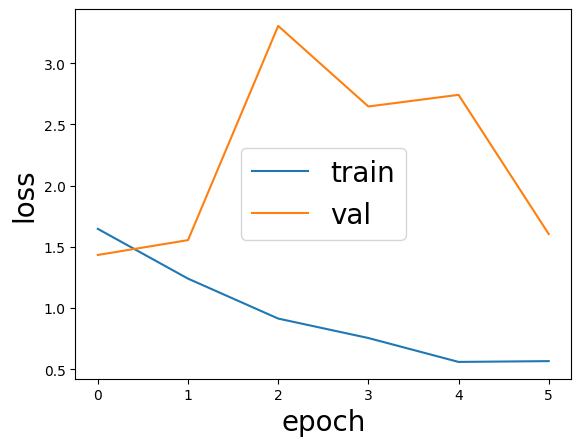

In [42]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,event,duration
0,-1.637989,1.605418,1.508273,-1.939297,2.780414,0.718762,0.224684,-1.723335,-1.135589,0.819108,...,1.440016,-1.336201,2.050762,-2.193039,0.196192,1.763554,-1.454528,-0.740844,1.0,1.095170
1,-0.312713,0.630058,-0.079538,-0.634071,0.791191,0.320191,-0.152891,-0.605148,-0.482419,0.512559,...,0.646418,-0.236117,1.247277,-0.555840,0.172314,0.592016,-0.258011,-0.024160,0.0,14.152338
2,-1.062338,1.094116,0.968958,-1.480592,2.020218,0.399195,0.115026,-1.190024,-0.738241,0.561649,...,1.024957,-0.737530,1.609648,-1.533393,0.172188,1.292921,-1.001832,-0.487709,1.0,2.770781
3,-1.426517,1.638734,0.884384,-1.520764,2.228353,0.940846,0.034403,-1.607245,-1.187772,1.064405,...,1.487722,-1.403433,2.079319,-1.752878,0.191109,1.447477,-1.216227,-0.453738,1.0,5.270507
4,-1.573211,1.699187,1.064473,-1.625271,2.399228,0.993772,0.015821,-1.712766,-1.209225,1.056227,...,1.564542,-1.492886,2.127418,-1.925531,0.186834,1.521729,-1.336997,-0.508649,0.0,4.120578


In [44]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [45]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

KeyError: "None of [Index(['seq_temporal_SGOT', 'seq_temporal_age', 'seq_temporal_albumin',\n       'seq_temporal_alkaline', 'seq_temporal_platelets',\n       'seq_temporal_prothrombin', 'seq_temporal_serBilir',\n       'seq_temporal_serChol'],\n      dtype='object')] are in the [columns]"

In [ ]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [ ]:
masks, padded_patients = padded_mask_processing(df_train)

In [ ]:
padded_patients.shape

In [ ]:
masks.shape

In [ ]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [ ]:
df_y_train.head()

In [ ]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [ ]:
df_temp.head()

In [ ]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [ ]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [ ]:
Y_labels

In [46]:
import torch
from torch.utils.data import TensorDataset

X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(X_features_data_tensor, Y_labels, masks,
                                                                          test_size=0.3)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)

In [47]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# Hyperparameters
# input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [48]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [49]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 5
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 1/40, Training Loss: 1.0692308630262102, Validation Loss: 5.179639418919881, Validation Accuracy: 0.6382978723404256
Epoch 2/40, Training Loss: 1.0088079571723938, Validation Loss: 4.750667850176494, Validation Accuracy: 0.7021276595744681
Epoch 3/40, Training Loss: 0.9231948448078973, Validation Loss: 4.268499394257863, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 4/40, Training Loss: 0.9308723424162183, Validation Loss: 4.192205786705017, Validation Accuracy: 0.7659574468085106
Epoch 5/40, Training Loss: 0.9999380058475903, Validation Loss: 4.3977987964948015, Validation Accuracy: 0.7446808510638298


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 6/40, Training Loss: 0.810533976980618, Validation Loss: 4.390820364157359, Validation Accuracy: 0.7446808510638298
Epoch 7/40, Training Loss: 0.84916631345238, Validation Loss: 4.152063369750977, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 8/40, Training Loss: 0.8416839390993118, Validation Loss: 4.056055724620819, Validation Accuracy: 0.776595744680851
Epoch 9/40, Training Loss: 0.8598869602595057, Validation Loss: 4.112903495629628, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 10/40, Training Loss: 0.8600494286843708, Validation Loss: 3.9283041755358377, Validation Accuracy: 0.7978723404255319
Epoch 11/40, Training Loss: 0.8255364969372749, Validation Loss: 4.118585924307506, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 12/40, Training Loss: 0.7820815635578973, Validation Loss: 4.163677434126536, Validation Accuracy: 0.7553191489361702
Epoch 13/40, Training Loss: 0.8034812659025192, Validation Loss: 4.191348036130269, Validation Accuracy: 0.7553191489361702


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 14/40, Training Loss: 0.8571057894400188, Validation Loss: 3.7784919142723083, Validation Accuracy: 0.8297872340425532
Epoch 15/40, Training Loss: 0.7691879900438445, Validation Loss: 4.291560431321462, Validation Accuracy: 0.7553191489361702


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 16/40, Training Loss: 0.813651867210865, Validation Loss: 4.469822824001312, Validation Accuracy: 0.7340425531914894
Epoch 17/40, Training Loss: 0.7736236719148499, Validation Loss: 4.371493220329285, Validation Accuracy: 0.723404255319149


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 18/40, Training Loss: 0.9152594719614301, Validation Loss: 4.282503962516785, Validation Accuracy: 0.7659574468085106
Epoch 19/40, Training Loss: 0.8162102486406054, Validation Loss: 3.9621055722236633, Validation Accuracy: 0.8085106382978723
Epoch 20/40, Training Loss: 0.7902528888412884, Validation Loss: 3.9120259284973145, Validation Accuracy: 0.7978723404255319
Early stopping triggered. No improvement in validation loss for 5 consecutive epochs.


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [50]:
torch.save(model.state_dict(), 'pre_trained_timevisit.pth')

In [51]:
from model.survtimesurvival_model import TransformerClassifier_2

In [52]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pre_trained_timevisit.pth')
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [54]:
masks, padded_patients = padded_mask_processing(df_train)

KeyError: 'seq_id'

In [ ]:
new_embedding = []
for i in range(len(masks)):
    a = masks[i].unsqueeze(0)
    output = model(X_features_data_tensor[i], a)
    new_embedding.append(output)

In [ ]:
# Convert each tensor to a numpy array and stack them
numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [ ]:
new_df = pd.DataFrame(numpy_array[0])
new_df = new_df.transpose()

In [ ]:
dataframe_for_survtrace = pd.concat([new_df, df_y_train],axis = 1)

In [ ]:
dataframe_for_survtrace.head()

In [ ]:
df_temp.head()

In [ ]:
dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis = 1)

In [ ]:
dataframe_for_survtrace.rename(columns = {'proportion':'proportion_1'}, inplace = True)
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [ ]:
df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
df_2.rename(columns = {'seq_time_id':'duration'}, inplace = True)

In [ ]:
df_2.info()

In [ ]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [ ]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(df_2)

In [ ]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [ ]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=16,
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

In [ ]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()

In [7]:
df.head()

,event,time,seq_temporal_SGOT,seq_temporal_age,seq_temporal_albumin,seq_temporal_alkaline,seq_temporal_platelets,seq_temporal_prothrombin,seq_temporal_serBilir,seq_temporal_serChol,...,seq_temporal_drug_1.0,seq_temporal_edema_1.0,seq_temporal_edema_2.0,seq_temporal_hepatomegaly_1.0,seq_temporal_hepatomegaly_2.0,seq_temporal_histologic_1.0,seq_temporal_histologic_2.0,seq_temporal_histologic_3.0,seq_temporal_spiders_1.0,seq_temporal_spiders_2.0
0,1.0,0.569489,-1.485263,0.248058,-0.894575,0.195532,-0.529101,0.136768,3.281890,1.169016e-16,...,0,1,0,1,0,0,0,1,1,0
1,1.0,0.569489,0.195488,0.248058,-1.570646,0.285613,-0.456022,0.813132,2.015877,-4.694608e-01,...,0,1,0,1,0,0,0,1,1,0
2,0.0,14.152338,-0.442126,1.292856,-1.431455,-0.605844,-1.395605,0.339677,0.172710,-6.589138e-01,...,0,1,0,1,0,0,1,0,1,0
3,0.0,14.152338,-0.046806,1.292856,-1.172958,-0.512364,-1.259888,0.339677,-0.013468,-6.036567e-01,...,0,1,0,1,0,0,1,0,1,0
4,0.0,14.152338,0.293680,1.292856,-1.312149,-0.443529,-1.364286,0.339677,0.098239,1.169016e-16,...,0,1,0,1,0,0,1,0,1,0


In [8]:
df.rename(columns={'time': 'duration'}, inplace=True)

In [9]:
y, df, df_train, df_y_train = pbc2_proccess_covariate(df)

26.0
______
8
______
13
______
21
______
26
______
[2.73792575e-03 3.83309605e-02 1.86178951e-01 4.73661154e-01
 1.43056620e+01]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [10]:
df_train = pd.concat([df_train, df_temp['seq_id']], axis=1, join='inner')
df_y_train = pd.concat([df_y_train, df_temp['seq_id']], axis=1, join='inner')

In [11]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [12]:
padded_patients.shape

torch.Size([312, 16, 21])

In [13]:
masks.shape

torch.Size([312, 16])

In [14]:
df_y_train = df_y_train.drop_duplicates(subset='seq_id', keep='last')
df_y_train = df_y_train.reset_index(drop=True)
df_y_train = df_y_train.drop(columns=['seq_id'])

In [15]:
df_y_train.head()

,duration,event,proportion
0,3,1.0,0.006928
1,3,0.0,0.988915
2,3,1.0,0.019002
3,2,1.0,0.314286
4,3,0.0,0.263658


In [16]:
df_temp = df_temp.drop_duplicates(subset='seq_id', keep='last')
df_temp = df_temp.reset_index(drop=True)
df_temp = df_temp.drop(columns=['seq_id'])

In [17]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [18]:
X_features_data_tensor = padded_patients
Y_labels_data_tensor = torch.tensor(df_y_train.values)

In [19]:
Y_labels = Y_labels_data_tensor[:, 1]
Y_labels = Y_labels.long()

In [20]:
Y_labels

tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [21]:
import torch
from torch.utils.data import TensorDataset

X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(X_features_data_tensor, Y_labels, masks,
                                                                          test_size=0.3)
train_data = TensorDataset(X_train, y_train, masks_train)
val_data = TensorDataset(X_val, y_val, masks_val)

In [22]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from model.survtimesurvival_model import TransformerClassifierFirstSolution, TransformerClassifier

# Hyperparameters
# input_dim = 26
embed_dim = 16
num_heads = 2
ffn_hidden_dim = 64
num_layers = 2
batch_size = 8
num_classes = 2

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Set up training configurations
input_dim = X_features_data_tensor.size(2)
seq_length = X_features_data_tensor.size(1)

print("Input Dimension", input_dim)
print("Sequence Length", seq_length)

model = TransformerClassifierFirstSolution(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, 2)

Input Dimension 21
Sequence Length 16


In [23]:
# HUNG: IMPORTANCE. IF YOU KEEP nn.CrossEntropyLoss(), this loss will return a number!!!!
# criterion = nn.NLLLoss(reduction="none")
criterion = torch.nn.CrossEntropyLoss(reduction="none")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

In [24]:
# Train the model
num_epochs = 40
train_loss_his = []
val_loss_his = []
val_accuracy_his = []

patience = 5
best_val_loss = None
epochs_since_best_val_loss = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target, label_mask) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data, label_mask)
        loss = criterion(output, target)
        # Assume loss has shape (B, S, D). Assume mask has shape (B, S)
        # Apply label mask to the loss.
        # In the label. Assume 1 is NOT PAD, and 0 is pad.
        loss = (loss * label_mask.unsqueeze(-1).float())

        # Average over the third dimension
        loss = loss.mean(-1)

        # Average over each sequence (dimension 1).
        # Since each sequence has different length. We need to do this
        loss = torch.sum(loss, dim=-1) / torch.sum(label_mask, dim=-1, keepdim=True)

        # Then average over the batch
        loss = loss.mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluate on validation set
    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_targets = []
    with torch.no_grad():
        for batch_idx, (data, target, masks) in enumerate(val_loader):
            output = model(data, masks)
            loss = criterion(output, target)
            # val_running_loss += loss.item()
            val_running_loss += loss.sum().item()
            # val_running_loss += loss.mean().item()
            preds = output.argmax(dim=1).cpu().numpy()
            val_preds.extend(preds)
            val_targets.extend(target.cpu().numpy())

    # Calculate the accuracy of the model on the validation set
    val_accuracy = accuracy_score(val_targets, val_preds)

    print(f"Epoch {epoch + 1}/{num_epochs}, "
          f"Training Loss: {running_loss / len(train_loader)}, "
          f"Validation Loss: {val_running_loss / len(val_loader)}, "
          f"Validation Accuracy: {val_accuracy}")

    train_loss_his.append(running_loss / len(train_loader))
    val_loss_his.append(val_running_loss / len(val_loader))
    val_accuracy_his.append(val_accuracy)
    if best_val_loss is None or abs(val_running_loss) < abs(best_val_loss):
        best_val_loss = val_running_loss
        epochs_since_best_val_loss = 0
    else:
        epochs_since_best_val_loss += 1

    if epochs_since_best_val_loss > patience:
        print(f"Early stopping triggered. No improvement in validation loss for {patience} consecutive epochs.")
        break

/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 1/40, Training Loss: 1.1546853589160102, Validation Loss: 5.164184292157491, Validation Accuracy: 0.7021276595744681
Epoch 2/40, Training Loss: 1.0363736599683762, Validation Loss: 4.686038692792256, Validation Accuracy: 0.7127659574468085


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 3/40, Training Loss: 0.9915388630969184, Validation Loss: 4.417252918084462, Validation Accuracy: 0.7446808510638298
Epoch 4/40, Training Loss: 0.9438113953386035, Validation Loss: 4.240097622076671, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 5/40, Training Loss: 0.9098979426281792, Validation Loss: 4.757251739501953, Validation Accuracy: 0.6595744680851063
Epoch 6/40, Training Loss: 0.8730978603873935, Validation Loss: 4.302286505699158, Validation Accuracy: 0.7659574468085106


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 7/40, Training Loss: 0.8774937284844262, Validation Loss: 4.0891793966293335, Validation Accuracy: 0.7978723404255319
Epoch 8/40, Training Loss: 0.8592709856373923, Validation Loss: 4.28009049097697, Validation Accuracy: 0.7446808510638298


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 9/40, Training Loss: 0.9128998007093158, Validation Loss: 3.9366037448247275, Validation Accuracy: 0.8085106382978723
Epoch 10/40, Training Loss: 0.8412086027009147, Validation Loss: 4.119917392730713, Validation Accuracy: 0.7872340425531915


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 11/40, Training Loss: 0.8407732067363602, Validation Loss: 3.9327303965886435, Validation Accuracy: 0.8085106382978723
Epoch 12/40, Training Loss: 0.8396224336964744, Validation Loss: 3.8166668812433877, Validation Accuracy: 0.8085106382978723


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 13/40, Training Loss: 0.8116430789232254, Validation Loss: 3.729815204938253, Validation Accuracy: 0.8297872340425532
Epoch 14/40, Training Loss: 0.841129162481853, Validation Loss: 4.004198968410492, Validation Accuracy: 0.7978723404255319


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 15/40, Training Loss: 0.8742395575557437, Validation Loss: 3.831449826558431, Validation Accuracy: 0.8191489361702128
Epoch 16/40, Training Loss: 0.8684167287179402, Validation Loss: 4.551189164320628, Validation Accuracy: 0.7127659574468085


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(
/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


Epoch 17/40, Training Loss: 0.8631650262645313, Validation Loss: 3.8158905307451882, Validation Accuracy: 0.8297872340425532
Epoch 18/40, Training Loss: 0.8133591711521149, Validation Loss: 3.9032195806503296, Validation Accuracy: 0.8085106382978723
Epoch 19/40, Training Loss: 0.8037843470062528, Validation Loss: 4.434272269407908, Validation Accuracy: 0.723404255319149
Early stopping triggered. No improvement in validation loss for 5 consecutive epochs.


/Users/davidlee/opt/anaconda3/envs/synthcity/lib/python3.9/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/transformers/attention.cpp:152.)
  return torch._native_multi_head_attention(


In [25]:
torch.save(model.state_dict(), 'pre_trained_timevisit.pth')

In [26]:
from model.survtimesurvival_model import TransformerClassifier_2

In [27]:
model = TransformerClassifier_2(input_dim, seq_length, embed_dim, num_heads, ffn_hidden_dim, num_layers, num_classes)
pretrained_weights = torch.load('pre_trained_timevisit.pth')
model.load_state_dict(pretrained_weights)

<All keys matched successfully>

In [28]:
masks, padded_patients = padded_mask_processing(df_train)

16 16


In [29]:
new_embedding = []
for i in range(len(masks)):
    a = masks[i].unsqueeze(0)
    output = model(X_features_data_tensor[i], a)
    new_embedding.append(output)

In [30]:
# Convert each tensor to a numpy array and stack them
numpy_arrays = [tensor.detach().numpy() for tensor in new_embedding]
numpy_array = np.stack(numpy_arrays, axis=-1) # this stacks along a new third dimension

In [31]:
new_df = pd.DataFrame(numpy_array[0])
new_df = new_df.transpose()

In [32]:
dataframe_for_survtrace = pd.concat([new_df, df_y_train],axis = 1)

In [33]:
dataframe_for_survtrace.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,duration,event,proportion
0,-1.955041,-1.721436,0.569247,-0.923079,1.956077,0.887013,-1.569422,1.830083,2.286685,1.395342,...,-1.488844,1.334881,-0.356562,-1.304382,-1.278894,-0.876006,0.956893,3,1.0,0.006928
1,-0.574410,-0.773499,0.682165,0.062707,0.470850,-0.055405,-0.579911,0.925766,0.732016,0.427328,...,-0.312154,0.348906,0.131584,0.005128,-0.337654,0.031611,-0.015768,3,0.0,0.988915
2,-1.462760,-1.446503,0.618519,-0.566297,1.473058,0.558168,-1.225739,1.518705,1.742739,1.041495,...,-1.106496,1.003973,-0.182808,-0.806937,-0.983234,-0.602325,0.561053,3,1.0,0.019002
3,-1.143020,-1.160507,0.683322,-0.331975,0.999394,0.276631,-1.002753,1.286471,1.313092,0.835497,...,-0.767041,0.688395,-0.036567,-0.525078,-0.663046,-0.286970,0.419005,2,1.0,0.314286
4,-1.307825,-1.281725,0.637986,-0.491528,1.210795,0.394576,-1.122316,1.411521,1.514330,0.953359,...,-0.921480,0.837519,-0.127979,-0.689495,-0.800208,-0.407489,0.554449,3,0.0,0.263658


In [34]:
df_temp.head()

,seq_time_id,event,time
0,1.095170,1.0,0.569489
1,14.152338,0.0,14.152338
2,2.770781,1.0,0.736502
3,5.270507,1.0,0.276531
4,4.120578,0.0,4.120578


In [35]:
dataframe_for_survtrace = pd.concat([dataframe_for_survtrace, df_temp['seq_time_id']], axis = 1)

In [36]:
dataframe_for_survtrace.rename(columns = {'proportion':'proportion_1'}, inplace = True)
dataframe_for_survtrace.columns = dataframe_for_survtrace.columns.astype(str)

In [37]:
df_2 = dataframe_for_survtrace.drop(columns=['duration', 'proportion_1'])
df_2.rename(columns = {'seq_time_id':'duration'}, inplace = True)

In [38]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         312 non-null    float32
 1   1         312 non-null    float32
 2   2         312 non-null    float32
 3   3         312 non-null    float32
 4   4         312 non-null    float32
 5   5         312 non-null    float32
 6   6         312 non-null    float32
 7   7         312 non-null    float32
 8   8         312 non-null    float32
 9   9         312 non-null    float32
 10  10        312 non-null    float32
 11  11        312 non-null    float32
 12  12        312 non-null    float32
 13  13        312 non-null    float32
 14  14        312 non-null    float32
 15  15        312 non-null    float32
 16  16        312 non-null    float32
 17  17        312 non-null    float32
 18  18        312 non-null    float32
 19  19        312 non-null    float32
 20  20        312 non-null    float3

In [39]:
from utils.covariate_data_processing import pbc2_proccess_covariate_firstsolution

In [40]:
y, df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = pbc2_proccess_covariate_firstsolution(df_2)

0
______
21
______
0
______
21
______
0
______
[ 0.11225496  2.06987187  3.72357902  6.68738364 14.30566203]
______
4


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/utils.py:78: UserWarning: Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.
  warnings.warn("""Got event/censoring at start time. Should be removed! It is set s.t. it has no contribution to loss.""")


In [43]:
from SurvTRACE.survtrace.utils import set_random_seed
from SurvTRACE.survtrace.model import SurvTraceSingle
from SurvTRACE.survtrace.config import STConfig
from SurvTRACE.survtrace.train_utils import Trainer

set_random_seed(STConfig['seed'])

hparams = {
    'batch_size': 64,
    'weight_decay': 1e-4,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [45]:
# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit(train_set=(df_train, df_y_train), val_set=(df_val, df_y_val),
                                   batch_size=16,
                                   epochs=hparams['epochs'],
                                   learning_rate=hparams['learning_rate'],
                                   weight_decay=hparams['weight_decay'],)

GPU not found! will use cpu for training!
[Train-0]: 20.11461639404297
[Val-0]: 1.9362283945083618


/Users/davidlee/Documents/GitHub/Surtimesurvival/SurvTRACE/survtrace/train_utils.py:216: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


[Train-1]: 16.84450364112854
[Val-1]: 1.3794490098953247
[Train-2]: 12.609484434127808
[Val-2]: 1.1034659147262573
[Train-3]: 9.72447293996811
[Val-3]: 2.5310254096984863
EarlyStopping counter: 1 out of 5
[Train-4]: 8.110051453113556
[Val-4]: 1.8808785676956177
EarlyStopping counter: 2 out of 5
[Train-5]: 7.765608161687851
[Val-5]: 0.8988417387008667
[Train-6]: 7.298661440610886
[Val-6]: 0.9098318815231323
EarlyStopping counter: 1 out of 5
[Train-7]: 6.748107939958572
[Val-7]: 1.3521775007247925
EarlyStopping counter: 2 out of 5
[Train-8]: 6.692856162786484
[Val-8]: 1.2210348844528198
EarlyStopping counter: 3 out of 5
[Train-9]: 6.316194295883179
[Val-9]: 1.0270107984542847
EarlyStopping counter: 4 out of 5
[Train-10]: 5.849664255976677
[Val-10]: 1.1667438745498657
EarlyStopping counter: 5 out of 5
early stops at epoch 11


In [46]:
# evaluate model
from SurvTRACE.survtrace.evaluate_utils import Evaluator
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
For 0.25 quantile,
TD Concordance Index - IPCW: 0.954502892104355
Brier Score: 0.08291923368913334
For 0.5 quantile,
TD Concordance Index - IPCW: 0.9541242954706481
Brier Score: 0.05708553189097888
For 0.75 quantile,
TD Concordance Index - IPCW: 0.929453761544105
Brier Score: 0.14290907672676328
done


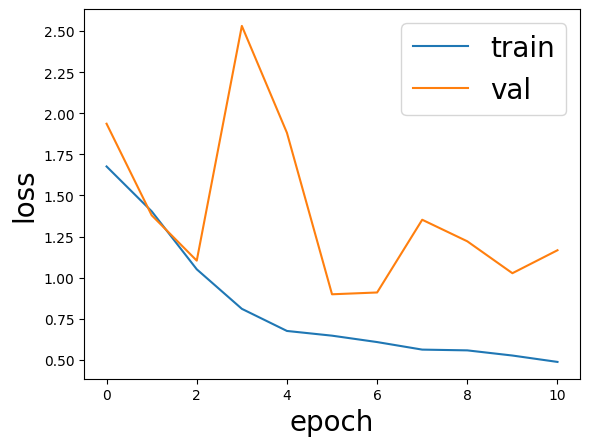

In [48]:
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()